<img align="right" src="../../../additional_data/banner_siegel.png" style="width:1000px;">

# Exercise for plotting 

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from your browser
* **Compatibility:** Notebook currently compatible with the Open Data Cube environments of the University of Wuerzburg


## Load packages and connect to eo2cube datacube

Import following libraries 

* datacube 
* matplotlib.pyplot as plt 
* pandas as pd
* seaborn as sns
* with_ui_cbk from odc.ui 
* rgb from dea_tools.plotting 

And then, connect to eo2cube dataset. 

In [2]:
import datacube
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from odc.ui import with_ui_cbk
from dea_tools.plotting import rgb 
dc = datacube.Datacube(app = "Exercise_for_plotting")

Load Sentinel-2 data from the eo2cube datacube with dc.load() function and following options.<br> 

* Longitude range: (24.39, 24.69), <br> 
* Latitude range: (-28.23, -28.38) <br> 
* Time range: 2020-08-01 to 2020-08-15 <br> 
* Bands: blue, green, red, Near Infrared , Short Wave Infrared-1, a Scene Classification map <br> 
* Output coordinate system: EPSG:32734 <br> 
* Resolution: 10m <br> 
* Select only solar days 
* Use loading bar


In [3]:
ds = dc.load(product= "s2_l2a",
               x = (24.39, 24.69),
               y = (-28.23, -28.38),
               output_crs = "EPSG:32734",
               time = ("2020-08-15", "2020-09-15"),
               measurements = ["blue", "green", "red","nir","swir_1","SCL"],
               resolution = (-10,10),
               group_by = "solar_day",
               progress_cbk=with_ui_cbk())

ds

/opt/conda/lib/python3.9/site-packages/datacube/drivers/postgres/_api.py:564: SAWarning: Class CommonTimestamp will not make use of SQL compilation caching as it does not set the 'inherit_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Set this attribute to True if this object can make use of the cache key generated by the superclass.  Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)
  return self._connection.execute(select_query)
/opt/conda/lib/python3.9/site-packages/datacube/drivers/postgres/_api.py:564: SAWarning: Class Float8Range will not make use of SQL compilation caching as it does not set the 'inherit_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  

<xarray.Dataset>
Dimensions:      (time: 13, y: 1750, x: 2994)
Coordinates:
  * time         (time) datetime64[ns] 2020-08-15T08:38:13 ... 2020-09-14T08:...
  * y            (y) float64 6.873e+06 6.873e+06 ... 6.855e+06 6.855e+06
  * x            (x) float64 8.322e+05 8.323e+05 ... 8.622e+05 8.622e+05
    spatial_ref  int32 32734
Data variables:
    blue         (time, y, x) uint16 767 719 687 643 681 ... 650 616 667 659 631
    green        (time, y, x) uint16 1023 953 919 871 901 ... 858 971 978 978
    red          (time, y, x) uint16 1412 1328 1328 1250 ... 1400 1648 1848 1890
    nir          (time, y, x) uint16 2046 1874 1998 1876 ... 1960 2296 2564 2564
    swir_1       (time, y, x) uint16 2883 2884 2884 2931 ... 3453 3882 3882 4070
    SCL          (time, y, x) uint8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5 5
Attributes:
    crs:           EPSG:32734
    grid_mapping:  spatial_ref

## Raster plotting 

1. Plot the dataset of the first time stamp as True Color Composite with `rgb` function 

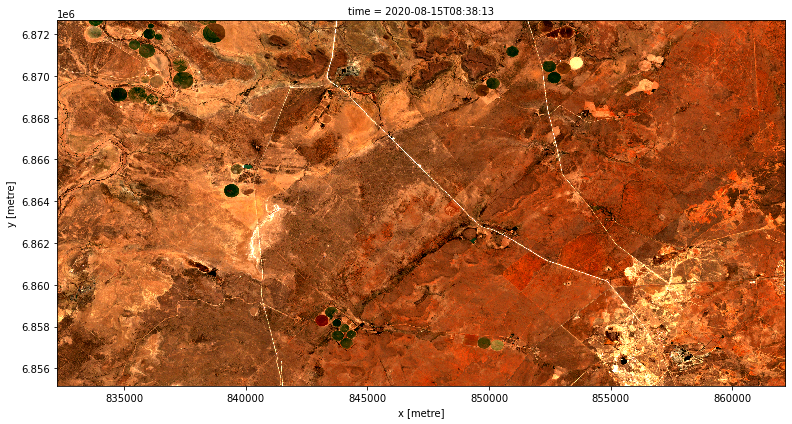

In [4]:
rgb(ds.isel(time=[0]), bands=['red', 'green', 'blue'], col="time")

2. Select the first time stamp and visualize as agriculture Composite. [Examples of False Color Composites](http://gsp.humboldt.edu/olm/Courses/GSP_216/lessons/composites.html) 

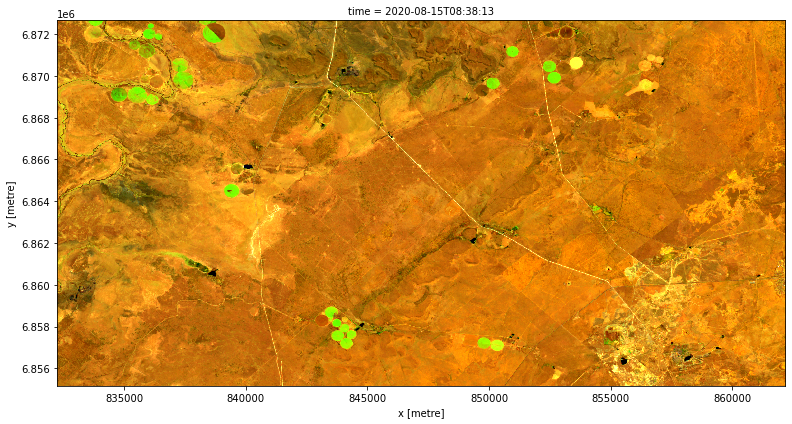

In [5]:
rgb(ds.isel(time=[0]), bands=['swir_1', 'nir', 'blue'], col="time")

3. Plot Near Infrared band of two time stamps (the first and the last stamp) using facet plot. Plot only one column in one row. The argument `figsize` can set the width and height.

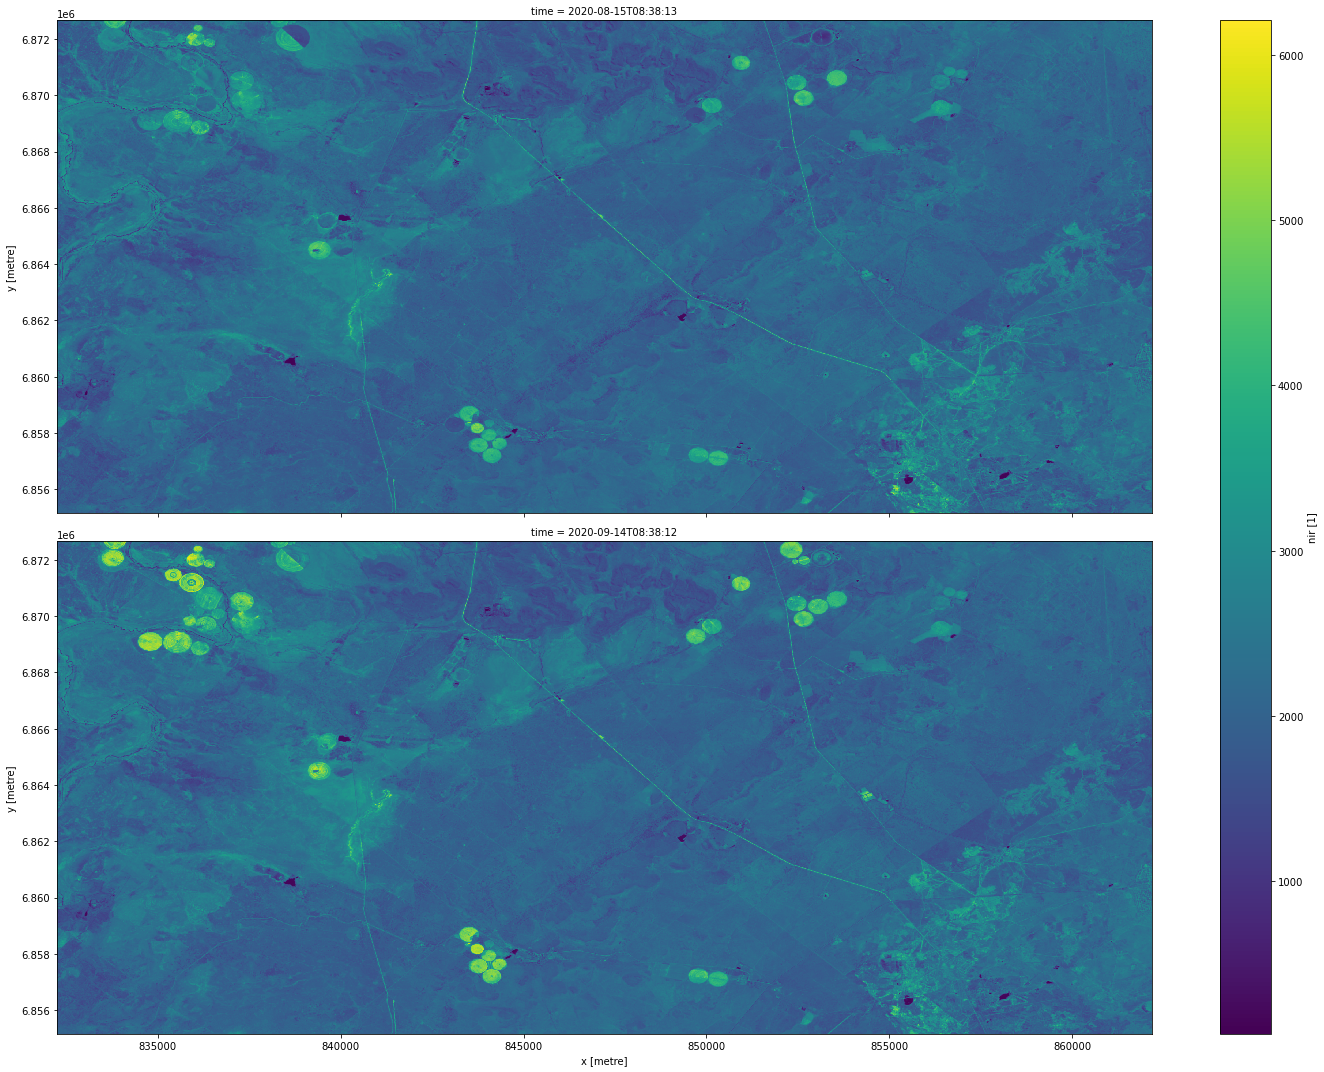

In [6]:
ds.isel(time=[0,12]).nir.plot(col="time", col_wrap=1,figsize = (20,15))

4. Mask out not-vegetated area using SCL band and plot Near Infrared band with the last and first time stamp like before. 

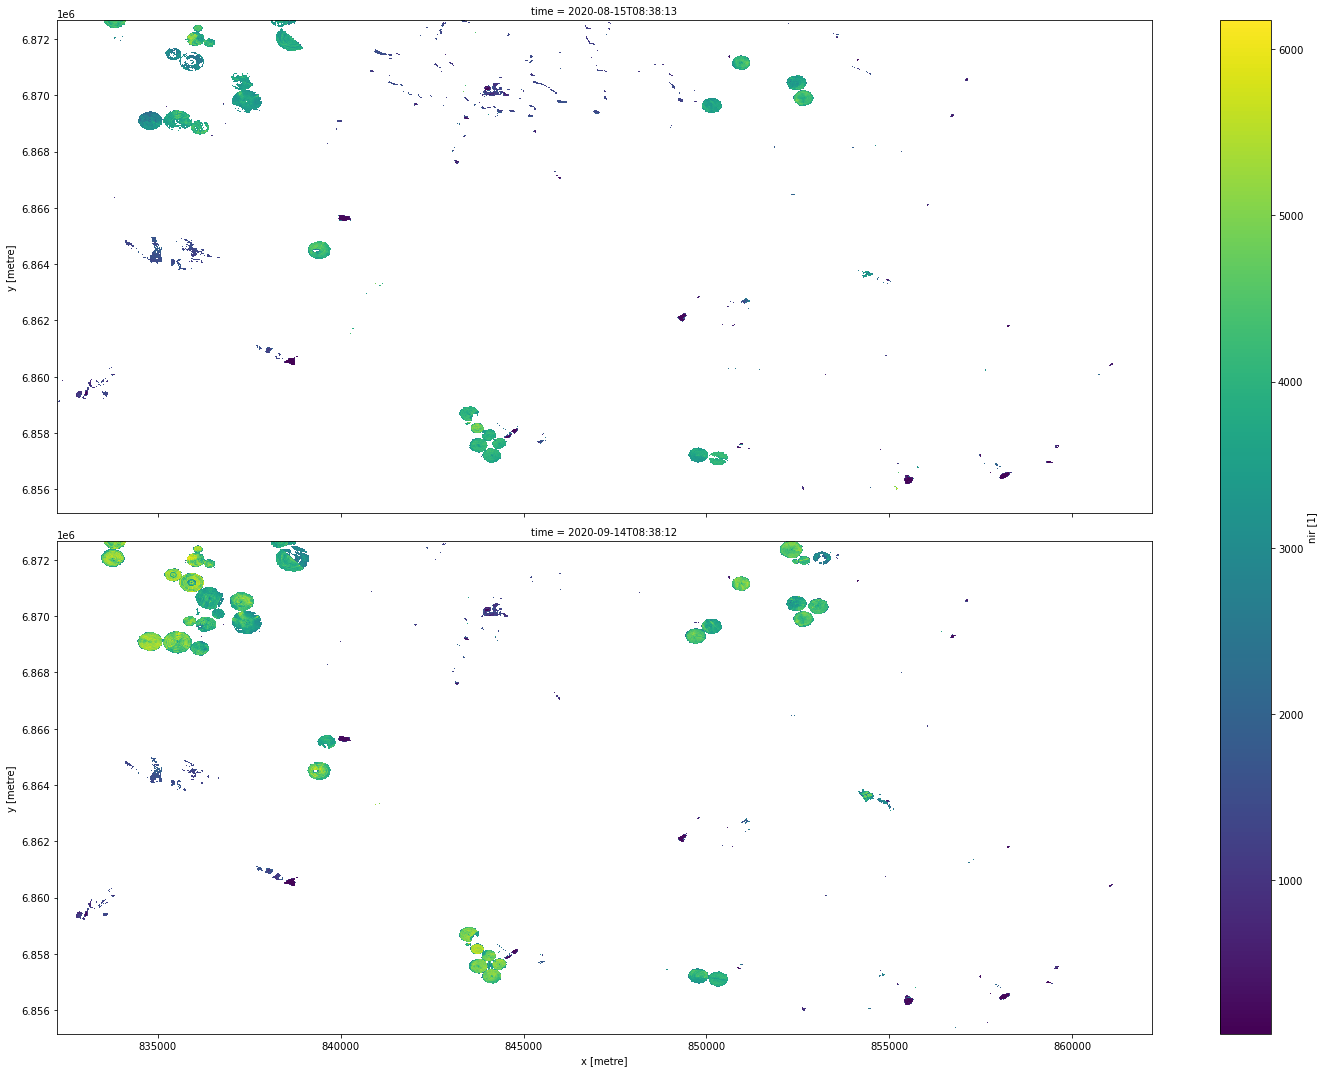

In [7]:
ds.isel(time=[0,12]).nir.where(ds.SCL != 5).plot(figsize = (20,15), col="time", col_wrap=1)

5. Plot monthly average values (August and September) with same options before. (NIR band, figsize setting, one column in a row) And use the [`cmap`]("https://matplotlib.org/stable/tutorials/colors/colormaps.html") and `levels` argument. 

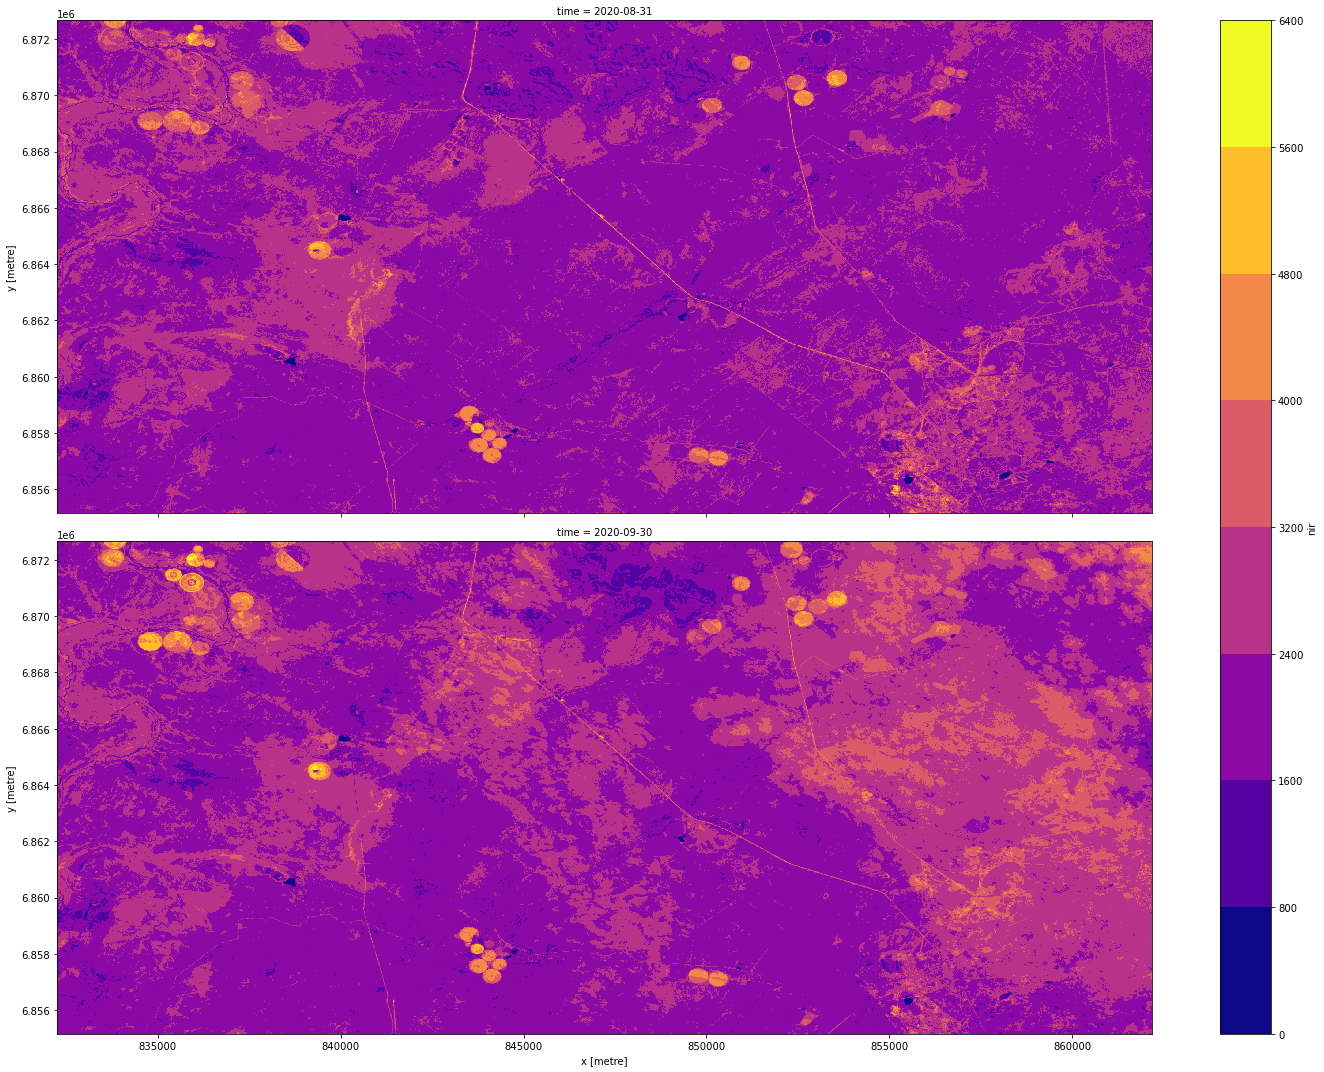

In [8]:
ds.nir.resample(time='1M').mean().plot(figsize = (20,15), col="time", col_wrap=1, cmap="plasma", levels=10)

## Panda Dataframe and Seaborn plotting 

First, create a pandas dataframe of mean values of each time stamp. And delete "spaital_ref" and "SCL" columns using `drop` function. 

In [9]:
df = ds.mean(dim=["x","y"]).to_dataframe()
df = df.drop(['spatial_ref','SCL'], axis=1)
df.head()

blue        green          red          nir  \
time                                                                     
2020-08-15 08:38:13  675.911630   965.008795  1449.793401  2134.720758   
2020-08-17 08:28:20  640.084454  1031.310161  1580.200231  2339.069999   
2020-08-20 08:38:15  577.472747   949.459260  1493.381022  2234.495638   
2020-08-22 08:28:18  769.519444  1081.943148  1585.950153  2306.925603   
2020-08-25 08:38:13  664.222237   995.310601  1518.544189  2206.232775   

                          swir_1  
time                              
2020-08-15 08:38:13  3166.421738  
2020-08-17 08:28:20  3331.668783  
2020-08-20 08:38:15  3190.687766  
2020-08-22 08:28:18  3338.397496  
2020-08-25 08:38:13  3263.790893

Next, create a violin plot of all columns

<AxesSubplot:>

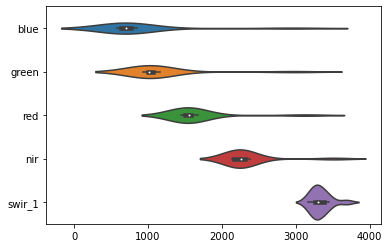

In [10]:
sns.violinplot(data=df, orient='h') #violin plot

Last, create a pairplot from seaborn using only NIR and Red bands. The title of the plot is "Correlation between NIR and red"

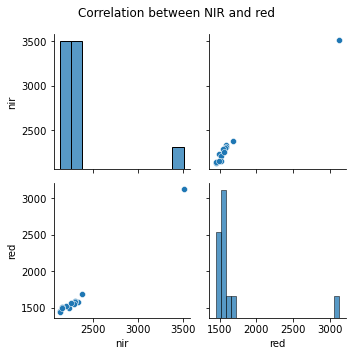

In [11]:
sns.pairplot(df[["nir","red"]])
plt.suptitle("Correlation between NIR and red") #main title
plt.tight_layout()
plt.show()

***

## Additional information

<font size="2">This notebook for the usage in the Open Data Cube entities of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is adapted from [Geoscience Australia](https://github.com/GeoscienceAustralia/dea-notebooks), published using the Apache License, Version 2.0. Thanks! </font>

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** June 2022